<a href="https://colab.research.google.com/github/EndreszBalazs/BMEVITMAV45/blob/main/DataProcessingECMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import os
import sys

import json
import pickle

import numpy as np
import pandas as pd
import torch
from torchsummary import summary
import matplotlib.pyplot as plt

In [1]:
!gdown --id 1KDIG-PHl5gglaZzeiBtcwAVPx7QSSu89

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KDIG-PHl5gglaZzeiBtcwAVPx7QSSu89
To: /content/data.csv
100% 7.58M/7.58M [00:00<00:00, 147MB/s]


In [45]:
data = pd.read_csv("data.csv")
data.rename(columns = {0:'Date'}, inplace = False)
cols = data.columns.tolist()
cols = cols[-1:]+cols[1:-1]
data  = data[cols]
data = data.set_index("Date")
data

,1515,1516,1518,1521,1719,1720,1722,1723,2040,2046,...,2751,2545,2740,210896,744612,744616,744618,744624,210888,210900
Date,,,,,,,,,,,,,,,,,,,,,
1951-01-01,-114.0,-8.0,-88.0,130.0,238.5,NaN,204.5,194.5,305.0,408,...,NaN,18.0,NaN,362.0,NaN,NaN,NaN,NaN,438.0,414.0
1951-01-02,-122.0,-22.0,-102.0,110.0,200.5,NaN,182.5,160.5,260.0,376,...,NaN,20.0,NaN,349.0,NaN,NaN,NaN,NaN,417.0,400.0
1951-01-03,-129.0,-32.0,-119.0,80.0,164.5,NaN,164.5,114.5,220.0,334,...,NaN,16.0,NaN,328.0,NaN,NaN,NaN,NaN,390.0,388.0
1951-01-04,-134.0,-36.0,-124.0,60.0,132.5,NaN,128.5,88.5,182.0,286,...,NaN,16.0,NaN,302.0,NaN,NaN,NaN,NaN,360.0,370.0
1951-01-05,-153.0,-52.0,-135.0,50.0,110.5,NaN,108.5,80.5,147.0,239,...,NaN,6.0,NaN,270.0,NaN,NaN,NaN,NaN,322.0,349.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,-27.0,75.0,-69.0,309.0,478.0,460.0,138.0,204.0,451.0,-78,...,198.0,-18.0,85.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN
2020-12-28,-94.0,21.0,-50.0,333.0,488.0,460.0,206.0,252.0,464.0,20,...,216.0,-17.0,85.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN
2020-12-29,-137.0,-20.0,-92.0,311.0,481.0,459.0,201.0,250.0,461.0,120,...,215.0,-22.0,87.0,NaN,NaN,NaN,NaN,24.0,NaN,NaN


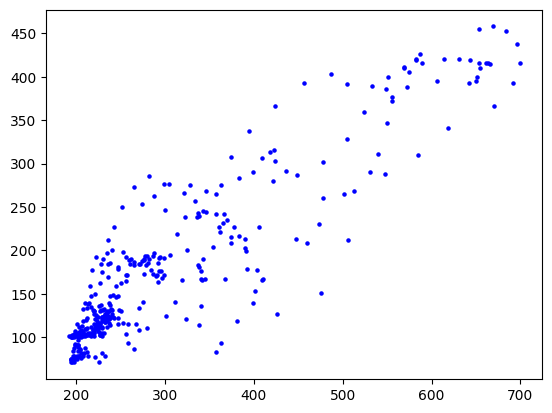

In [98]:
plot_data = data.loc[(data.index >= "2016-12-18") & (data.index <= "2017-12-24")]
y = plot_data["1724"].to_list()
x = np.linspace(1,len(y),len(y))
fig,ax = plt.subplots()
y2 = plot_data["2275"].to_list()
ax.scatter(y, y2,s = 5,color="blue",marker="o")
plt.show()

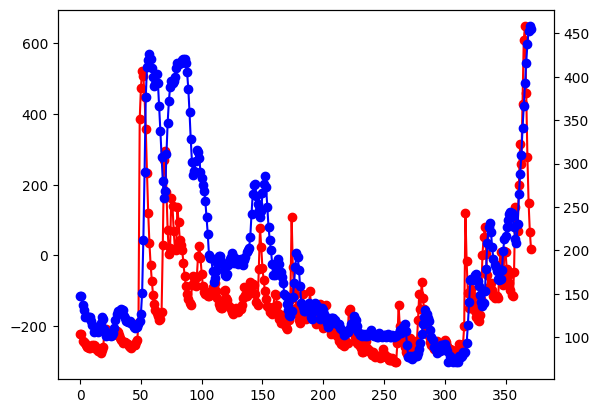

In [99]:
plot_data = data.loc[(data.index >= "2016-12-18") & (data.index <= "2017-12-24")]
y = plot_data["1515"].to_list()
x = np.linspace(1,len(y),len(y))
fig,ax = plt.subplots()
ax.plot(y,color="red", marker="o")
ax2=ax.twinx()
y2 = plot_data["2275"].to_list()
ax2.plot(y2,color="blue",marker="o")
plt.show()